In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.naive_bayes import GaussianNB


In [3]:
dados = pd.read_csv('top5-players.csv')

In [4]:
# Exibir as primeiras linhas e as colunas do DataFrame
print(dados.head())

   Rk             Player   Nation    Pos           Squad                Comp  \
0   1         Max Aarons  eng ENG     DF     Bournemouth  eng Premier League   
1   2   Brenden Aaronson   us USA  MF,FW    Union Berlin       de Bundesliga   
2   3    Paxten Aaronson   us USA     MF  Eint Frankfurt       de Bundesliga   
3   4  Keyliane Abdallah   fr FRA     FW       Marseille          fr Ligue 1   
4   5   Yunis Abdelhamid   ma MAR     DF           Reims          fr Ligue 1   

    Age    Born  MP  Starts  ...  Gls_90  Ast_90  G+A_90  G-PK_90  G+A-PK_90  \
0  23.0  2000.0  20      13  ...    0.00    0.07    0.07     0.00       0.07   
1  22.0  2000.0  30      14  ...    0.14    0.14    0.28     0.14       0.28   
2  19.0  2003.0   7       1  ...    0.00    0.89    0.89     0.00       0.89   
3  17.0  2006.0   1       0  ...    0.00    0.00    0.00     0.00       0.00   
4  35.0  1987.0  31      31  ...    0.13    0.00    0.13     0.10       0.10   

   xG_90  xAG_90  xG+xAG_90  npxG_90  

In [5]:
print(dados.columns)

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls_90', 'Ast_90', 'G+A_90', 'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90',
       'xG+xAG_90', 'npxG_90', 'npxG+xAG_90'],
      dtype='object')


In [6]:
# Convertendo variáveis categóricas para numéricas
label_encoders = {}
categorical_columns = ['Nation', 'Squad', 'Comp', 'Pos']  # Adicione outras colunas categóricas conforme necessário


In [7]:
for col in categorical_columns:
    if col in dados.columns:
        le = LabelEncoder()
        dados[col + '_encoded'] = le.fit_transform(dados[col])
        label_encoders[col] = le
    else:
        print(f"A coluna '{col}' não está presente no DataFrame.")


In [8]:
# Normalização das colunas numéricas
colunas_numericas = dados.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler(feature_range=(0, 1))
dados[colunas_numericas] = scaler.fit_transform(dados[colunas_numericas])


In [9]:
# Seleção de colunas para o modelo
colunas_para_remover = ['Player']  # Adicione outras colunas a serem removidas se necessário
colunas_encoded = [col + '_encoded' for col in categorical_columns if col in dados.columns]
X = dados.drop(colunas_para_remover + categorical_columns, axis=1, errors='ignore').values
X = dados[colunas_encoded].values  # Use apenas colunas codificadas para o modelo

In [10]:
# Verifique se 'Pos_encoded' foi criada e use-a como variável dependente
if 'Pos_encoded' in dados.columns:
    Y = dados['Pos_encoded'].values
else:
    raise ValueError("A coluna 'Pos_encoded' não foi criada. Verifique a codificação das variáveis.")


In [11]:
# Verificar se Y é contínuo
if np.issubdtype(Y.dtype, np.number):
    # Converter valores contínuos para categorias discretas (exemplo simples usando binning)
    Y = pd.cut(Y, bins=10, labels=False)


In [12]:
# Dividindo o dataset em conjunto de treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.25, random_state=0)


In [14]:
# Aplicando modelo Naive-Bayes
# Modelo Gaussiano
modelo1 = GaussianNB()
modelo1.fit(X_treino, Y_treino)
Y_previsto = modelo1.predict(X_teste)

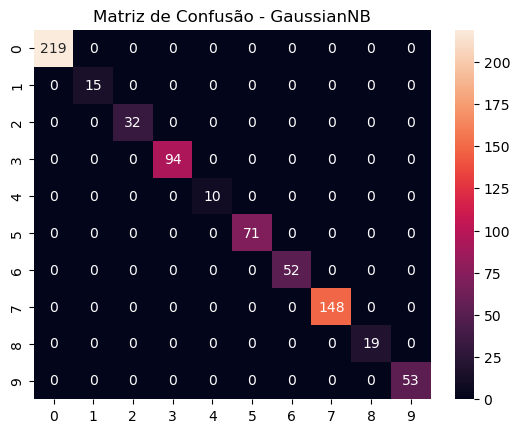

In [15]:
# Gerando a matriz de confusão e métricas de avaliação
cm1 = confusion_matrix(Y_teste, Y_previsto)
sns.heatmap(cm1, annot=True, fmt="d")
plt.title("Matriz de Confusão - GaussianNB")
plt.show()

In [33]:
print("Acurácia (Treinamento): {:.2f}%".format(modelo1.score(X_treino, Y_treino) * 100))
print("Acurácia (Teste): {:.2f}%".format(modelo1.score(X_teste, Y_teste) * 100))

Acurácia (Treinamento): 100.00%
Acurácia (Teste): 100.00%


In [34]:
# Métricas de classificação
cr = classification_report(Y_teste, Y_previsto)
print("Relatório de Classificação - GaussianNB:")
print(cr)

Relatório de Classificação - GaussianNB:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        94
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        71
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00       148
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00        53

    accuracy                           1.00       713
   macro avg       1.00      1.00      1.00       713
weighted avg       1.00      1.00      1.00       713



In [35]:
f1 = f1_score(Y_teste, Y_previsto, average='macro')
print("F1 score = {:0.2f}%".format(f1 * 100))

F1 score = 100.00%


In [36]:
precisao = precision_score(Y_teste, Y_previsto, average='macro')
print("Precision score = {:0.2f}%".format(precisao * 100))

Precision score = 100.00%


In [37]:
rec = recall_score(Y_teste, Y_previsto, average='macro')
print("Recall score = {:0.2f}%".format(rec * 100))

Recall score = 100.00%


In [38]:

acc = accuracy_score(Y_teste, Y_previsto)
print("Accuracy score = {:0.2f}%".format(acc * 100))

Accuracy score = 100.00%


In [39]:
print(dados['Pos_encoded'].value_counts())


Pos_encoded
0.000000    848
0.777778    569
0.333333    403
0.555556    320
1.000000    245
0.666667    203
0.222222    108
0.888889     81
0.111111     47
0.444444     28
Name: count, dtype: int64
